In [1]:
!pip install autogluon

In [2]:
# prompt: import pandas

import pandas as pd
# The following lines are not needed since you've already installed them
# !pip install autogluon
# !pip install --upgrade numpy pandas


In [3]:
df=pd.read_csv("/content/merged_all_data_2016_2024.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35727 entries, 0 to 35726
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   away_attempted_passes   35725 non-null  float64
 1   away_points             35720 non-null  float64
 2   home_points             35720 non-null  float64
 3   home_goalkeeper_saves   35665 non-null  float64
 4   home_formation          35724 non-null  object 
 5   away_successful_passes  35725 non-null  float64
 6   home_shots              35725 non-null  float64
 7   game_week               35727 non-null  object 
 8   home_goals              35727 non-null  int64  
 9   home_offsides           35190 non-null  float64
 10  date                    35727 non-null  object 
 11  away_possession         35727 non-null  object 
 12  away_corners            35726 non-null  float64
 13  away_yellow_cards       35331 non-null  float64
 14  away_formation          35717 non-null

In [5]:
print(df['date'].head())
print(df['date'].dtype)

0    2016-08-12 19:30:00+00:00
1    2016-08-13 15:00:00+00:00
2    2016-08-13 17:15:00+00:00
3    2016-08-13 19:30:00+00:00
4    2016-08-14 15:00:00+00:00
Name: date, dtype: object
object


In [6]:
print(df['home_possession'].unique()[:10])

['40%' '58%' '69%' '46%' '57%' '67%' '49%' '61%' '39%' '66%']


In [7]:
def clean_base_columns(df):
    import pandas as pd

    # 1. تحويل date إلى datetime
    df['date'] = pd.to_datetime(df['date'])

    # 2. تحويل possession من "56%" إلى float 56.0
    for col in ['home_possession', 'away_possession']:
        df[col] = df[col].str.replace('%', '').astype(float)

    return df


In [8]:
print(df['home_rank'].isna().sum())
print(df['away_rank'].isna().sum())
print(df[['home_rank', 'away_rank']].describe())


7
7
          home_rank     away_rank
count  35720.000000  35720.000000
mean      10.347256     10.344233
std        6.071198      6.060936
min        1.000000      1.000000
25%        5.000000      5.000000
50%       10.000000     10.000000
75%       15.000000     15.000000
max       30.000000     30.000000


In [9]:
def fill_missing_ranks(df):
    # تعويض home_rank
    df['home_rank'] = df.groupby(['league', 'season'])['home_rank']\
                        .transform(lambda x: x.fillna(x.mean()))

    # تعويض away_rank
    df['away_rank'] = df.groupby(['league', 'season'])['away_rank']\
                        .transform(lambda x: x.fillna(x.mean()))

    return df


In [10]:
print(df['home_points'].isna().sum())
print(df['away_points'].isna().sum())
print(df[['home_points', 'away_points']].describe())

7
7
        home_points   away_points
count  35720.000000  35720.000000
mean      44.765034     44.740230
std       17.513920     17.526329
min        0.000000      0.000000
25%       33.000000     33.000000
50%       43.000000     43.000000
75%       55.000000     54.000000
max      102.000000    102.000000


In [11]:
def fill_missing_points(df):
    df['home_points'] = df.groupby(['league', 'season'])['home_points']\
                          .transform(lambda x: x.fillna(x.mean()))

    df['away_points'] = df.groupby(['league', 'season'])['away_points']\
                          .transform(lambda x: x.fillna(x.mean()))

    return df


In [12]:
def clean_formations(df):
    for col in ['home_formation', 'away_formation']:
        df[col] = df[col].fillna('Unknown')

    from sklearn.preprocessing import LabelEncoder
    le_home = LabelEncoder()
    le_away = LabelEncoder()

    df['home_formation_encoded'] = le_home.fit_transform(df['home_formation'])
    df['away_formation_encoded'] = le_away.fit_transform(df['away_formation'])

    return df, le_home, le_away


In [13]:
print(df['home_offsides'].isna().sum())
print(df['away_offsides'].isna().sum())
print(df[['home_offsides', 'away_offsides']].describe())

537
537
       home_offsides  away_offsides
count   35190.000000   35190.000000
mean        1.941063       1.782296
std         1.619577       1.539012
min         0.000000       0.000000
25%         1.000000       1.000000
50%         2.000000       1.000000
75%         3.000000       3.000000
max        14.000000      14.000000


In [14]:
def fill_missing_offsides(df):
    df['home_offsides'] = df['home_offsides'].fillna(0)
    df['away_offsides'] = df['away_offsides'].fillna(0)
    return df


In [15]:
print(df['home_red_cards'].isna().sum())
print(df['away_red_cards'].isna().sum())
print(df[['home_red_cards', 'away_red_cards']].describe())


9645
9633
       home_red_cards  away_red_cards
count    26082.000000    26094.000000
mean         0.134844        0.167855
std          0.368352        0.404664
min          0.000000        0.000000
25%          0.000000        0.000000
50%          0.000000        0.000000
75%          0.000000        0.000000
max          3.000000        3.000000


In [16]:
def fill_missing_red_cards(df):
    df['home_red_cards'] = df['home_red_cards'].fillna(0)
    df['away_red_cards'] = df['away_red_cards'].fillna(0)
    return df

In [17]:
print(df['home_yellow_cards'].isna().sum())
print(df['away_yellow_cards'].isna().sum())
print(df[['home_yellow_cards', 'away_yellow_cards']].describe())


396
396
       home_yellow_cards  away_yellow_cards
count       35331.000000       35331.000000
mean            2.073250           2.320314
std             1.417417           1.462117
min             0.000000           0.000000
25%             1.000000           1.000000
50%             2.000000           2.000000
75%             3.000000           3.000000
max            10.000000          11.000000


In [18]:
def fill_missing_yellow_cards(df):
    df['home_yellow_cards'] = df.groupby(['league', 'season'])['home_yellow_cards']\
                                .transform(lambda x: x.fillna(x.mean()))

    df['away_yellow_cards'] = df.groupby(['league', 'season'])['away_yellow_cards']\
                                .transform(lambda x: x.fillna(x.mean()))

    return df


In [19]:
print(df['home_goalkeeper_saves'].isna().sum())
print(df['away_goalkeeper_saves'].isna().sum())
print(df[['home_goalkeeper_saves', 'away_goalkeeper_saves']].describe())


62
62
       home_goalkeeper_saves  away_goalkeeper_saves
count           35665.000000           35665.000000
mean                2.718800               3.292920
std                 1.853353               2.075021
min                 0.000000               0.000000
25%                 1.000000               2.000000
50%                 2.000000               3.000000
75%                 4.000000               4.000000
max                15.000000              19.000000


In [20]:
def fill_missing_goalkeeper_saves(df):
    df['home_goalkeeper_saves'] = df.groupby(['league', 'season'])['home_goalkeeper_saves']\
                                     .transform(lambda x: x.fillna(x.mean()))

    df['away_goalkeeper_saves'] = df.groupby(['league', 'season'])['away_goalkeeper_saves']\
                                     .transform(lambda x: x.fillna(x.mean()))
    return df


In [21]:
print(df[['home_attempted_passes', 'home_successful_passes',
          'away_attempted_passes', 'away_successful_passes']].isna().sum())

print(df[['home_attempted_passes', 'home_successful_passes',
          'away_attempted_passes', 'away_successful_passes']].describe())


home_attempted_passes     2
home_successful_passes    2
away_attempted_passes     2
away_successful_passes    2
dtype: int64
       home_attempted_passes  home_successful_passes  away_attempted_passes  \
count           35725.000000            35725.000000           35725.000000   
mean              438.515365              352.547815             416.288539   
std               114.468341              117.192804             108.755025   
min                 0.000000                0.000000               0.000000   
25%               357.000000              268.000000             339.000000   
50%               429.000000              342.000000             405.000000   
75%               510.000000              426.000000             482.000000   
max              1059.000000              981.000000             993.000000   

       away_successful_passes  
count            35725.000000  
mean               329.067241  
std                111.159133  
min                  0.000000  
25%

In [22]:
def fill_missing_passes(df):
    for col in ['home_attempted_passes', 'home_successful_passes',
                'away_attempted_passes', 'away_successful_passes']:
        df[col] = df.groupby(['league', 'season'])[col]\
                    .transform(lambda x: x.fillna(x.mean()))
    return df


In [23]:
print(df['home_corners'].isna().sum())
print(df['away_corners'].isna().sum())
print(df[['home_corners', 'away_corners']].describe())


1
1
       home_corners  away_corners
count  35726.000000  35726.000000
mean       5.456607      4.453821
std        2.966504      2.615043
min        0.000000      0.000000
25%        3.000000      3.000000
50%        5.000000      4.000000
75%        7.000000      6.000000
max       26.000000     19.000000


In [24]:
def fill_missing_corners(df):
    df['home_corners'] = df.groupby(['league', 'season'])['home_corners']\
                            .transform(lambda x: x.fillna(x.mean()))

    df['away_corners'] = df.groupby(['league', 'season'])['away_corners']\
                            .transform(lambda x: x.fillna(x.mean()))
    return df


In [25]:
print(df[['home_shots', 'away_shots',
          'home_shots_on_target', 'away_shots_on_target']].isna().sum())

print(df[['home_shots', 'away_shots',
          'home_shots_on_target', 'away_shots_on_target']].describe())


home_shots              2
away_shots              2
home_shots_on_target    0
away_shots_on_target    0
dtype: int64
         home_shots    away_shots  home_shots_on_target  away_shots_on_target
count  35725.000000  35725.000000          35727.000000          35727.000000
mean      13.954387     11.389654              4.833405              3.915315
std        5.324528      4.738321              2.552031              2.295833
min        0.000000      0.000000              0.000000              0.000000
25%       10.000000      8.000000              3.000000              2.000000
50%       13.000000     11.000000              5.000000              4.000000
75%       17.000000     14.000000              6.000000              5.000000
max       47.000000     45.000000             25.000000             23.000000


In [26]:
def fill_missing_shots(df):
    df['home_shots'] = df.groupby(['league', 'season'])['home_shots']\
                          .transform(lambda x: x.fillna(x.mean()))

    df['away_shots'] = df.groupby(['league', 'season'])['away_shots']\
                          .transform(lambda x: x.fillna(x.mean()))
    return df


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35727 entries, 0 to 35726
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   away_attempted_passes   35725 non-null  float64
 1   away_points             35720 non-null  float64
 2   home_points             35720 non-null  float64
 3   home_goalkeeper_saves   35665 non-null  float64
 4   home_formation          35724 non-null  object 
 5   away_successful_passes  35725 non-null  float64
 6   home_shots              35725 non-null  float64
 7   game_week               35727 non-null  object 
 8   home_goals              35727 non-null  int64  
 9   home_offsides           35190 non-null  float64
 10  date                    35727 non-null  object 
 11  away_possession         35727 non-null  object 
 12  away_corners            35726 non-null  float64
 13  away_yellow_cards       35331 non-null  float64
 14  away_formation          35717 non-null

In [28]:
# مثال:
df = fill_missing_ranks(df)
df = fill_missing_points(df)
df = fill_missing_offsides(df)
df = fill_missing_red_cards(df)
df = fill_missing_yellow_cards(df)
df = fill_missing_goalkeeper_saves(df)
df = fill_missing_passes(df)
df = fill_missing_corners(df)
df = fill_missing_shots(df)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35727 entries, 0 to 35726
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   away_attempted_passes   35727 non-null  float64
 1   away_points             35727 non-null  float64
 2   home_points             35727 non-null  float64
 3   home_goalkeeper_saves   35727 non-null  float64
 4   home_formation          35724 non-null  object 
 5   away_successful_passes  35727 non-null  float64
 6   home_shots              35727 non-null  float64
 7   game_week               35727 non-null  object 
 8   home_goals              35727 non-null  int64  
 9   home_offsides           35727 non-null  float64
 10  date                    35727 non-null  object 
 11  away_possession         35727 non-null  object 
 12  away_corners            35727 non-null  float64
 13  away_yellow_cards       35727 non-null  float64
 14  away_formation          35717 non-null

In [30]:
def clean_formations(df):
    df['home_formation'] = df['home_formation'].fillna('Unknown')
    df['away_formation'] = df['away_formation'].fillna('Unknown')
    return df


In [31]:
def clean_possession(df):
    for col in ['home_possession', 'away_possession']:
        df[col] = df[col].str.replace('%', '').astype(float)
    return df

In [32]:
df=clean_formations(df)

In [33]:
df=clean_possession(df)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35727 entries, 0 to 35726
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   away_attempted_passes   35727 non-null  float64
 1   away_points             35727 non-null  float64
 2   home_points             35727 non-null  float64
 3   home_goalkeeper_saves   35727 non-null  float64
 4   home_formation          35727 non-null  object 
 5   away_successful_passes  35727 non-null  float64
 6   home_shots              35727 non-null  float64
 7   game_week               35727 non-null  object 
 8   home_goals              35727 non-null  int64  
 9   home_offsides           35727 non-null  float64
 10  date                    35727 non-null  object 
 11  away_possession         35727 non-null  float64
 12  away_corners            35727 non-null  float64
 13  away_yellow_cards       35727 non-null  float64
 14  away_formation          35727 non-null

In [35]:

# prompt: show the df with all colmnse

import pandas as pd
pd.set_option("display.max_columns", None)
df


,away_attempted_passes,away_points,home_points,home_goalkeeper_saves,home_formation,away_successful_passes,home_shots,game_week,home_goals,home_offsides,date,away_possession,away_corners,away_yellow_cards,away_formation,home_yellow_cards,home_corners,away_goalkeeper_saves,away_red_cards,home_red_cards,home_attempted_passes,home_successful_passes,ht_home_goals,home_fouls,ht_away_goals,away_fouls,away_team,away_shots_on_target,away_shots,home_possession,fixture_id,home_shots_on_target,league,away_rank,season,home_rank,stadium,away_offsides,away_goals,home_team
0,481.0,76.0,49.0,4.0,4-1-4-1,378.0,13.0,Regular Season - 1,1,0.0,2016-08-12 19:30:00+00:00,60.0,3.0,3.0,4-3-3,2.0,5.0,5.0,1.0,1.0,315.0,218.0,1.0,9.0,1.0,17.0,FC Porto,7.0,12.0,40.0,24127,6.0,Primeira Liga,2.0,2016,7.0,Estádio dos Arcos,0.0,3,Rio Ave
1,323.0,36.0,33.0,1.0,4-3-3,215.0,14.0,Regular Season - 1,1,2.0,2016-08-13 15:00:00+00:00,42.0,3.0,0.0,4-2-3-1,0.0,6.0,3.0,0.0,0.0,439.0,337.0,0.0,17.0,1.0,20.0,Pacos Ferreira,2.0,9.0,58.0,24126,4.0,Primeira Liga,13.0,2016,15.0,Parque Joaquim Almeida Freitas,0.0,1,Moreirense
2,254.0,50.0,70.0,3.0,4-3-1-2,174.0,19.0,Regular Season - 1,2,1.0,2016-08-13 17:15:00+00:00,31.0,2.0,2.0,4-5-1,1.0,9.0,7.0,0.0,0.0,578.0,508.0,1.0,14.0,0.0,18.0,Maritimo,3.0,8.0,69.0,24125,9.0,Primeira Liga,6.0,2016,3.0,Estádio José Alvalade,4.0,0,Sporting CP
3,485.0,82.0,32.0,4.0,4-3-1-2,363.0,8.0,Regular Season - 1,0,3.0,2016-08-13 19:30:00+00:00,60.0,4.0,2.0,4-4-2,2.0,3.0,2.0,0.0,0.0,331.0,209.0,0.0,14.0,1.0,9.0,Benfica,6.0,12.0,40.0,24124,2.0,Primeira Liga,1.0,2016,16.0,Estádio João Cardoso,4.0,2,Tondela
4,379.0,32.0,43.0,4.0,4-2-3-1,264.0,11.0,Regular Season - 1,2,5.0,2016-08-14 15:00:00+00:00,54.0,6.0,4.0,4-2-3-1,1.0,6.0,0.0,0.0,0.0,323.0,214.0,2.0,21.0,0.0,14.0,Arouca,4.0,11.0,46.0,24123,2.0,Primeira Liga,17.0,2016,9.0,Estádio do Bessa,0.0,0,Boavista
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35722,254.0,48.0,67.0,1.0,4-2-3-1,177.0,13.0,Regular Season - 30,1,2.0,2025-04-05T19:00:00+00:00,26.0,3.0,1.0,4-2-3-1,2.0,9.0,4.0,0.0,0.0,728.0,662.0,1.0,16.0,1.0,12.0,Real Betis,2.0,6.0,74.0,1208755,5.0,La Liga,6.0,2024,1.0,Estadi Olímpic Lluís Companys,3.0,1,Barcelona
35723,378.0,41.0,26.0,5.0,4-4-2,306.0,13.0,Regular Season - 30,1,5.0,2025-04-06T12:00:00+00:00,49.0,4.0,2.0,4-1-4-1,0.0,5.0,4.0,0.0,0.0,382.0,294.0,0.0,8.0,1.0,10.0,Real Sociedad,8.0,13.0,51.0,1208757,5.0,La Liga,8.0,2024,19.0,Estadio de Gran Canaria,1.0,3,Las Palmas
35724,535.0,60.0,36.0,3.0,4-3-3,474.0,11.0,Regular Season - 30,1,0.0,2025-04-06T14:15:00+00:00,55.0,7.0,4.0,4-4-2,1.0,7.0,4.0,0.0,0.0,429.0,361.0,1.0,14.0,1.0,12.0,Atletico Madrid,5.0,13.0,45.0,1208760,6.0,La Liga,3.0,2024,12.0,Estadio Ramón Sánchez Pizjuán,0.0,2,Sevilla
35725,427.0,39.0,16.0,4.0,4-4-2,354.0,5.0,Regular Season - 30,0,1.0,2025-04-06T16:30:00+00:00,50.0,4.0,1.0,4-2-3-1,3.0,3.0,0.0,0.0,1.0,416.0,350.0,0.0,11.0,3.0,17.0,Getafe,9.0,16.0,50.0,1208762,0.0,La Liga,11.0,2024,20.0,Estadio Municipal José Zorrilla,2.0,4,Valladolid


In [36]:
import pandas as pd

def convert_to_team_level(df):
    team_rows = []

    for _, row in df.iterrows():
        # صف الفريق المضيف
        home_row = {
            'fixture_id': row['fixture_id'],
            'league': row['league'],
            'season': row['season'],
            'date': row['date'],
            'is_home': 1,
            'team_name': row['home_team'],
            'opponent_name': row['away_team'],
            'team_goals': row['home_goals'],
            'opponent_goals': row['away_goals'],
            'team_rank': row['home_rank'],
            'opponent_rank': row['away_rank'],
            'team_points': row['home_points'],
            'opponent_points': row['away_points'],
            'team_formation': row['home_formation'],
            'opponent_formation': row['away_formation'],
            'team_shots': row['home_shots'],
            'opponent_shots': row['away_shots'],
            'team_shots_on_target': row['home_shots_on_target'],
            'opponent_shots_on_target': row['away_shots_on_target'],
            'team_possession': row['home_possession'],
            'opponent_possession': row['away_possession'],
            'team_goalkeeper_saves': row['home_goalkeeper_saves'],
            'opponent_goalkeeper_saves': row['away_goalkeeper_saves'],
            'team_yellow_cards': row['home_yellow_cards'],
            'opponent_yellow_cards': row['away_yellow_cards'],
            'team_red_cards': row['home_red_cards'],
            'opponent_red_cards': row['away_red_cards'],
            'team_corners': row['home_corners'],
            'opponent_corners': row['away_corners'],
            'team_fouls': row['home_fouls'],
            'opponent_fouls': row['away_fouls'],
            'team_offsides': row['home_offsides'],
            'opponent_offsides': row['away_offsides'],
            'team_attempted_passes': row['home_attempted_passes'],
            'team_successful_passes': row['home_successful_passes'],
            'opponent_attempted_passes': row['away_attempted_passes'],
            'opponent_successful_passes': row['away_successful_passes'],
        }

        # صف الفريق الضيف
        away_row = {
            'fixture_id': row['fixture_id'],
            'league': row['league'],
            'season': row['season'],
            'date': row['date'],
            'is_home': 0,
            'team_name': row['away_team'],
            'opponent_name': row['home_team'],
            'team_goals': row['away_goals'],
            'opponent_goals': row['home_goals'],
            'team_rank': row['away_rank'],
            'opponent_rank': row['home_rank'],
            'team_points': row['away_points'],
            'opponent_points': row['home_points'],
            'team_formation': row['away_formation'],
            'opponent_formation': row['home_formation'],
            'team_shots': row['away_shots'],
            'opponent_shots': row['home_shots'],
            'team_shots_on_target': row['away_shots_on_target'],
            'opponent_shots_on_target': row['home_shots_on_target'],
            'team_possession': row['away_possession'],
            'opponent_possession': row['home_possession'],
            'team_goalkeeper_saves': row['away_goalkeeper_saves'],
            'opponent_goalkeeper_saves': row['home_goalkeeper_saves'],
            'team_yellow_cards': row['away_yellow_cards'],
            'opponent_yellow_cards': row['home_yellow_cards'],
            'team_red_cards': row['away_red_cards'],
            'opponent_red_cards': row['home_red_cards'],
            'team_corners': row['away_corners'],
            'opponent_corners': row['home_corners'],
            'team_fouls': row['away_fouls'],
            'opponent_fouls': row['home_fouls'],
            'team_offsides': row['away_offsides'],
            'opponent_offsides': row['home_offsides'],
            'team_attempted_passes': row['away_attempted_passes'],
            'team_successful_passes': row['away_successful_passes'],
            'opponent_attempted_passes': row['home_attempted_passes'],
            'opponent_successful_passes': row['home_successful_passes'],
        }

        team_rows.append(home_row)
        team_rows.append(away_row)

    df_team_level = pd.DataFrame(team_rows)

    # حساب team_result
    df_team_level['team_result'] = df_team_level.apply(
        lambda x: 'Win' if x['team_goals'] > x['opponent_goals']
        else ('Loss' if x['team_goals'] < x['opponent_goals'] else 'Draw'),
        axis=1
    )

    return df_team_level


In [37]:
df_team = convert_to_team_level(df)

In [38]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71454 entries, 0 to 71453
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fixture_id                  71454 non-null  int64  
 1   league                      71454 non-null  object 
 2   season                      71454 non-null  int64  
 3   date                        71454 non-null  object 
 4   is_home                     71454 non-null  int64  
 5   team_name                   71454 non-null  object 
 6   opponent_name               71454 non-null  object 
 7   team_goals                  71454 non-null  int64  
 8   opponent_goals              71454 non-null  int64  
 9   team_rank                   71454 non-null  float64
 10  opponent_rank               71454 non-null  float64
 11  team_points                 71454 non-null  float64
 12  opponent_points             71454 non-null  float64
 13  team_formation              714

In [39]:
df_team

,fixture_id,league,season,date,is_home,team_name,opponent_name,team_goals,opponent_goals,team_rank,opponent_rank,team_points,opponent_points,team_formation,opponent_formation,team_shots,opponent_shots,team_shots_on_target,opponent_shots_on_target,team_possession,opponent_possession,team_goalkeeper_saves,opponent_goalkeeper_saves,team_yellow_cards,opponent_yellow_cards,team_red_cards,opponent_red_cards,team_corners,opponent_corners,team_fouls,opponent_fouls,team_offsides,opponent_offsides,team_attempted_passes,team_successful_passes,opponent_attempted_passes,opponent_successful_passes,team_result
0,24127,Primeira Liga,2016,2016-08-12 19:30:00+00:00,1,Rio Ave,FC Porto,1,3,7.0,2.0,49.0,76.0,4-1-4-1,4-3-3,13.0,12.0,6.0,7.0,40.0,60.0,4.0,5.0,2.0,3.0,1.0,1.0,5.0,3.0,9.0,17.0,0.0,0.0,315.0,218.0,481.0,378.0,Loss
1,24127,Primeira Liga,2016,2016-08-12 19:30:00+00:00,0,FC Porto,Rio Ave,3,1,2.0,7.0,76.0,49.0,4-3-3,4-1-4-1,12.0,13.0,7.0,6.0,60.0,40.0,5.0,4.0,3.0,2.0,1.0,1.0,3.0,5.0,17.0,9.0,0.0,0.0,481.0,378.0,315.0,218.0,Win
2,24126,Primeira Liga,2016,2016-08-13 15:00:00+00:00,1,Moreirense,Pacos Ferreira,1,1,15.0,13.0,33.0,36.0,4-3-3,4-2-3-1,14.0,9.0,4.0,2.0,58.0,42.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0,3.0,17.0,20.0,2.0,0.0,439.0,337.0,323.0,215.0,Draw
3,24126,Primeira Liga,2016,2016-08-13 15:00:00+00:00,0,Pacos Ferreira,Moreirense,1,1,13.0,15.0,36.0,33.0,4-2-3-1,4-3-3,9.0,14.0,2.0,4.0,42.0,58.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,20.0,17.0,0.0,2.0,323.0,215.0,439.0,337.0,Draw
4,24125,Primeira Liga,2016,2016-08-13 17:15:00+00:00,1,Sporting CP,Maritimo,2,0,3.0,6.0,70.0,50.0,4-3-1-2,4-5-1,19.0,8.0,9.0,3.0,69.0,31.0,3.0,7.0,1.0,2.0,0.0,0.0,9.0,2.0,14.0,18.0,1.0,4.0,578.0,508.0,254.0,174.0,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71449,1208760,La Liga,2024,2025-04-06T14:15:00+00:00,0,Atletico Madrid,Sevilla,2,1,3.0,12.0,60.0,36.0,4-4-2,4-3-3,13.0,11.0,5.0,6.0,55.0,45.0,4.0,3.0,4.0,1.0,0.0,0.0,7.0,7.0,12.0,14.0,0.0,0.0,535.0,474.0,429.0,361.0,Win
71450,1208762,La Liga,2024,2025-04-06T16:30:00+00:00,1,Valladolid,Getafe,0,4,20.0,11.0,16.0,39.0,4-4-2,4-2-3-1,5.0,16.0,0.0,9.0,50.0,50.0,4.0,0.0,3.0,1.0,1.0,0.0,3.0,4.0,11.0,17.0,1.0,2.0,416.0,350.0,427.0,354.0,Loss
71451,1208762,La Liga,2024,2025-04-06T16:30:00+00:00,0,Getafe,Valladolid,4,0,11.0,20.0,39.0,16.0,4-2-3-1,4-4-2,16.0,5.0,9.0,0.0,50.0,50.0,0.0,4.0,1.0,3.0,0.0,1.0,4.0,3.0,17.0,11.0,2.0,1.0,427.0,354.0,416.0,350.0,Win
71452,1208759,La Liga,2024,2025-04-06T19:00:00+00:00,1,Villarreal,Athletic Club,0,0,5.0,4.0,48.0,54.0,4-4-2,4-2-3-1,12.0,11.0,4.0,2.0,57.0,43.0,2.0,4.0,0.0,1.0,1.0,0.0,6.0,5.0,9.0,13.0,1.0,1.0,498.0,417.0,374.0,310.0,Draw


In [40]:
import numpy as np
import pandas as pd

### 1️⃣ ترتيب البيانات زمنيًا لحساب rolling features
df_team_sorted = df_team.sort_values(by=['league', 'season', 'team_name', 'date']).reset_index(drop=True)

### 2️⃣ حساب recent_win_rate
def compute_recent_win_rate(df, window=5):
    df = df.copy()
    win_rate_list = []

    result_map = {'Win': 1.0, 'Draw': 0.5, 'Loss': 0.0}
    df['result_numeric'] = df['team_result'].map(result_map)

    grouped = df.groupby(['league', 'season', 'team_name'])

    for _, group in grouped:
        rolling_values = []
        for i in range(len(group)):
            past_results = group.iloc[max(0, i-window):i]['result_numeric'].values
            if len(past_results) == 0:
                rolling_values.append(np.nan)
            else:
                win_rate = np.mean(past_results)
                rolling_values.append(win_rate)

        df.loc[group.index, 'recent_win_rate'] = rolling_values

    df.drop(columns=['result_numeric'], inplace=True)
    return df

df_with_wr = compute_recent_win_rate(df_team_sorted)

### 3️⃣ حساب avg_goals_for و avg_goals_against
def compute_avg_goals(df, window=5):
    df = df.copy()
    grouped = df.groupby(['league', 'season', 'team_name'])

    avg_goals_for = []
    avg_goals_against = []

    for _, group in grouped:
        for i in range(len(group)):
            past_rows = group.iloc[max(0, i-window):i]
            if past_rows.empty:
                avg_goals_for.append(np.nan)
                avg_goals_against.append(np.nan)
            else:
                avg_for = past_rows['team_goals'].mean()
                avg_against = past_rows['opponent_goals'].mean()
                avg_goals_for.append(avg_for)
                avg_goals_against.append(avg_against)

    df['avg_goals_for'] = avg_goals_for
    df['avg_goals_against'] = avg_goals_against

    return df

df_with_wr = compute_avg_goals(df_with_wr)

### 4️⃣ حساب goal_difference
df_with_wr['goal_difference'] = df_with_wr['avg_goals_for'] - df_with_wr['avg_goals_against']

### 5️⃣ إرجاع الميزات إلى الترتيب الأصلي بدون حذف الصفوف
# حفظ الترتيب الأصلي
df_team['index_row'] = df_team.reset_index().index

# دمج الميزات مع البيانات الأصلية حسب fixture_id و team_name
df_final = pd.merge(
    df_team,
    df_with_wr[[
        'fixture_id', 'is_home', 'team_name',
        'recent_win_rate', 'avg_goals_for', 'avg_goals_against', 'goal_difference'
    ]],
    on=['fixture_id', 'is_home', 'team_name'],
    how='left'
)

# ترتيب الصفوف حسب ترتيبها الأصلي
df_final = df_final.sort_values('index_row').drop(columns='index_row').reset_index(drop=True)


In [41]:
df_final

,fixture_id,league,season,date,is_home,team_name,opponent_name,team_goals,opponent_goals,team_rank,opponent_rank,team_points,opponent_points,team_formation,opponent_formation,team_shots,opponent_shots,team_shots_on_target,opponent_shots_on_target,team_possession,opponent_possession,team_goalkeeper_saves,opponent_goalkeeper_saves,team_yellow_cards,opponent_yellow_cards,team_red_cards,opponent_red_cards,team_corners,opponent_corners,team_fouls,opponent_fouls,team_offsides,opponent_offsides,team_attempted_passes,team_successful_passes,opponent_attempted_passes,opponent_successful_passes,team_result,recent_win_rate,avg_goals_for,avg_goals_against,goal_difference
0,24127,Primeira Liga,2016,2016-08-12 19:30:00+00:00,1,Rio Ave,FC Porto,1,3,7.0,2.0,49.0,76.0,4-1-4-1,4-3-3,13.0,12.0,6.0,7.0,40.0,60.0,4.0,5.0,2.0,3.0,1.0,1.0,5.0,3.0,9.0,17.0,0.0,0.0,315.0,218.0,481.0,378.0,Loss,NaN,NaN,NaN,NaN
1,24127,Primeira Liga,2016,2016-08-12 19:30:00+00:00,0,FC Porto,Rio Ave,3,1,2.0,7.0,76.0,49.0,4-3-3,4-1-4-1,12.0,13.0,7.0,6.0,60.0,40.0,5.0,4.0,3.0,2.0,1.0,1.0,3.0,5.0,17.0,9.0,0.0,0.0,481.0,378.0,315.0,218.0,Win,NaN,NaN,NaN,NaN
2,24126,Primeira Liga,2016,2016-08-13 15:00:00+00:00,1,Moreirense,Pacos Ferreira,1,1,15.0,13.0,33.0,36.0,4-3-3,4-2-3-1,14.0,9.0,4.0,2.0,58.0,42.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0,3.0,17.0,20.0,2.0,0.0,439.0,337.0,323.0,215.0,Draw,NaN,NaN,NaN,NaN
3,24126,Primeira Liga,2016,2016-08-13 15:00:00+00:00,0,Pacos Ferreira,Moreirense,1,1,13.0,15.0,36.0,33.0,4-2-3-1,4-3-3,9.0,14.0,2.0,4.0,42.0,58.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,20.0,17.0,0.0,2.0,323.0,215.0,439.0,337.0,Draw,NaN,NaN,NaN,NaN
4,24125,Primeira Liga,2016,2016-08-13 17:15:00+00:00,1,Sporting CP,Maritimo,2,0,3.0,6.0,70.0,50.0,4-3-1-2,4-5-1,19.0,8.0,9.0,3.0,69.0,31.0,3.0,7.0,1.0,2.0,0.0,0.0,9.0,2.0,14.0,18.0,1.0,4.0,578.0,508.0,254.0,174.0,Win,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71449,1208760,La Liga,2024,2025-04-06T14:15:00+00:00,0,Atletico Madrid,Sevilla,2,1,3.0,12.0,60.0,36.0,4-4-2,4-3-3,13.0,11.0,5.0,6.0,55.0,45.0,4.0,3.0,4.0,1.0,0.0,0.0,7.0,7.0,12.0,14.0,0.0,0.0,535.0,474.0,429.0,361.0,Win,0.5,1.6,1.4,0.2
71450,1208762,La Liga,2024,2025-04-06T16:30:00+00:00,1,Valladolid,Getafe,0,4,20.0,11.0,16.0,39.0,4-4-2,4-2-3-1,5.0,16.0,0.0,9.0,50.0,50.0,4.0,0.0,3.0,1.0,1.0,0.0,3.0,4.0,11.0,17.0,1.0,2.0,416.0,350.0,427.0,354.0,Loss,0.1,0.8,2.6,-1.8
71451,1208762,La Liga,2024,2025-04-06T16:30:00+00:00,0,Getafe,Valladolid,4,0,11.0,20.0,39.0,16.0,4-2-3-1,4-4-2,16.0,5.0,9.0,0.0,50.0,50.0,0.0,4.0,1.0,3.0,0.0,1.0,4.0,3.0,17.0,11.0,2.0,1.0,427.0,354.0,416.0,350.0,Win,0.4,1.2,1.4,-0.2
71452,1208759,La Liga,2024,2025-04-06T19:00:00+00:00,1,Villarreal,Athletic Club,0,0,5.0,4.0,48.0,54.0,4-4-2,4-2-3-1,12.0,11.0,4.0,2.0,57.0,43.0,2.0,4.0,0.0,1.0,1.0,0.0,6.0,5.0,9.0,13.0,1.0,1.0,498.0,417.0,374.0,310.0,Draw,0.5,1.0,1.0,0.0


In [42]:
def add_opponent_features(df):
    df = df.copy()

    # نسوي نسخة الخصم بعكس is_home، ونغير أسماء الأعمدة عشان ندمجها
    opp_df = df[[
        'fixture_id', 'is_home', 'team_name',
        'recent_win_rate', 'avg_goals_for', 'goal_difference'
    ]].copy()

    # عكس is_home عشان نطابق الخصم الحقيقي
    opp_df['is_home'] = 1 - opp_df['is_home']

    # إعادة تسمية الأعمدة
    opp_df = opp_df.rename(columns={
        'team_name': 'opponent_name',
        'recent_win_rate': 'opponent_recent_win_rate',
        'avg_goals_for': 'opponent_avg_goals_for',
        'goal_difference': 'opponent_goal_difference'
    })

    # دمج مع df الأصلي حسب fixture_id + is_home + opponent_name
    df = pd.merge(
        df,
        opp_df,
        on=['fixture_id', 'is_home', 'opponent_name'],
        how='left'
    )

    return df


In [43]:
df_final = add_opponent_features(df_final)

In [44]:
df_final

,fixture_id,league,season,date,is_home,team_name,opponent_name,team_goals,opponent_goals,team_rank,opponent_rank,team_points,opponent_points,team_formation,opponent_formation,team_shots,opponent_shots,team_shots_on_target,opponent_shots_on_target,team_possession,opponent_possession,team_goalkeeper_saves,opponent_goalkeeper_saves,team_yellow_cards,opponent_yellow_cards,team_red_cards,opponent_red_cards,team_corners,opponent_corners,team_fouls,opponent_fouls,team_offsides,opponent_offsides,team_attempted_passes,team_successful_passes,opponent_attempted_passes,opponent_successful_passes,team_result,recent_win_rate,avg_goals_for,avg_goals_against,goal_difference,opponent_recent_win_rate,opponent_avg_goals_for,opponent_goal_difference
0,24127,Primeira Liga,2016,2016-08-12 19:30:00+00:00,1,Rio Ave,FC Porto,1,3,7.0,2.0,49.0,76.0,4-1-4-1,4-3-3,13.0,12.0,6.0,7.0,40.0,60.0,4.0,5.0,2.0,3.0,1.0,1.0,5.0,3.0,9.0,17.0,0.0,0.0,315.0,218.0,481.0,378.0,Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24127,Primeira Liga,2016,2016-08-12 19:30:00+00:00,0,FC Porto,Rio Ave,3,1,2.0,7.0,76.0,49.0,4-3-3,4-1-4-1,12.0,13.0,7.0,6.0,60.0,40.0,5.0,4.0,3.0,2.0,1.0,1.0,3.0,5.0,17.0,9.0,0.0,0.0,481.0,378.0,315.0,218.0,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24126,Primeira Liga,2016,2016-08-13 15:00:00+00:00,1,Moreirense,Pacos Ferreira,1,1,15.0,13.0,33.0,36.0,4-3-3,4-2-3-1,14.0,9.0,4.0,2.0,58.0,42.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0,3.0,17.0,20.0,2.0,0.0,439.0,337.0,323.0,215.0,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24126,Primeira Liga,2016,2016-08-13 15:00:00+00:00,0,Pacos Ferreira,Moreirense,1,1,13.0,15.0,36.0,33.0,4-2-3-1,4-3-3,9.0,14.0,2.0,4.0,42.0,58.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,20.0,17.0,0.0,2.0,323.0,215.0,439.0,337.0,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24125,Primeira Liga,2016,2016-08-13 17:15:00+00:00,1,Sporting CP,Maritimo,2,0,3.0,6.0,70.0,50.0,4-3-1-2,4-5-1,19.0,8.0,9.0,3.0,69.0,31.0,3.0,7.0,1.0,2.0,0.0,0.0,9.0,2.0,14.0,18.0,1.0,4.0,578.0,508.0,254.0,174.0,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71449,1208760,La Liga,2024,2025-04-06T14:15:00+00:00,0,Atletico Madrid,Sevilla,2,1,3.0,12.0,60.0,36.0,4-4-2,4-3-3,13.0,11.0,5.0,6.0,55.0,45.0,4.0,3.0,4.0,1.0,0.0,0.0,7.0,7.0,12.0,14.0,0.0,0.0,535.0,474.0,429.0,361.0,Win,0.5,1.6,1.4,0.2,0.4,0.8,-0.2
71450,1208762,La Liga,2024,2025-04-06T16:30:00+00:00,1,Valladolid,Getafe,0,4,20.0,11.0,16.0,39.0,4-4-2,4-2-3-1,5.0,16.0,0.0,9.0,50.0,50.0,4.0,0.0,3.0,1.0,1.0,0.0,3.0,4.0,11.0,17.0,1.0,2.0,416.0,350.0,427.0,354.0,Loss,0.1,0.8,2.6,-1.8,0.4,1.2,-0.2
71451,1208762,La Liga,2024,2025-04-06T16:30:00+00:00,0,Getafe,Valladolid,4,0,11.0,20.0,39.0,16.0,4-2-3-1,4-4-2,16.0,5.0,9.0,0.0,50.0,50.0,0.0,4.0,1.0,3.0,0.0,1.0,4.0,3.0,17.0,11.0,2.0,1.0,427.0,354.0,416.0,350.0,Win,0.4,1.2,1.4,-0.2,0.1,0.8,-1.8
71452,1208759,La Liga,2024,2025-04-06T19:00:00+00:00,1,Villarreal,Athletic Club,0,0,5.0,4.0,48.0,54.0,4-4-2,4-2-3-1,12.0,11.0,4.0,2.0,57.0,43.0,2.0,4.0,0.0,1.0,1.0,0.0,6.0,5.0,9.0,13.0,1.0,1.0,498.0,417.0,374.0,310.0,Draw,0.5,1.0,1.0,0.0,0.6,1.8,1.2


In [45]:
def compute_points_and_ranks(df):
    df = df.copy()
    df = df.sort_values(by=['league', 'season', 'date']).reset_index(drop=True)

    df['team_points'] = np.nan
    df['opponent_points'] = np.nan
    df['team_rank'] = np.nan
    df['opponent_rank'] = np.nan

    for (league, season), group in df.groupby(['league', 'season']):
        points_table = {}
        ranked_rows = []

        for i, row in group.iterrows():
            team = row['team_name']
            opponent = row['opponent_name']
            fixture_date = row['date']

            # سجل النقاط قبل المباراة
            team_pts = points_table.get(team, 0)
            opponent_pts = points_table.get(opponent, 0)

            df.loc[i, 'team_points'] = team_pts
            df.loc[i, 'opponent_points'] = opponent_pts

            # نحسب الرانك بعد التحديث المؤقت
            ranked_teams = sorted(points_table.items(), key=lambda x: -x[1])
            ranks = {team_name: rank+1 for rank, (team_name, _) in enumerate(ranked_teams)}

            df.loc[i, 'team_rank'] = ranks.get(team, np.nan)
            df.loc[i, 'opponent_rank'] = ranks.get(opponent, np.nan)

            # تحديث النقاط حسب نتيجة المباراة الحالية (بعد تسجيلها)
            if row['team_result'] == 'Win':
                points_table[team] = team_pts + 3
            elif row['team_result'] == 'Draw':
                points_table[team] = team_pts + 1
                points_table[opponent] = opponent_pts + 1
            elif row['team_result'] == 'Loss':
                points_table[opponent] = opponent_pts + 3

    return df


In [46]:
df_final = compute_points_and_ranks(df_final)

In [47]:
df_final['points_diff'] = df_final['team_points'] - df_final['opponent_points']
df_final['rank_diff'] = df_final['team_rank'] - df_final['opponent_rank']

In [48]:
df_final

,fixture_id,league,season,date,is_home,team_name,opponent_name,team_goals,opponent_goals,team_rank,opponent_rank,team_points,opponent_points,team_formation,opponent_formation,team_shots,opponent_shots,team_shots_on_target,opponent_shots_on_target,team_possession,opponent_possession,team_goalkeeper_saves,opponent_goalkeeper_saves,team_yellow_cards,opponent_yellow_cards,team_red_cards,opponent_red_cards,team_corners,opponent_corners,team_fouls,opponent_fouls,team_offsides,opponent_offsides,team_attempted_passes,team_successful_passes,opponent_attempted_passes,opponent_successful_passes,team_result,recent_win_rate,avg_goals_for,avg_goals_against,goal_difference,opponent_recent_win_rate,opponent_avg_goals_for,opponent_goal_difference,points_diff,rank_diff
0,17010,Bundesliga,2016,2016-08-26T18:30:00+00:00,1,Bayern Munich,Werder Bremen,6,0,NaN,NaN,0.0,0.0,4-3-3,4-1-4-1,27.0,4.0,14.0,2.0,70.0,30.0,2.0,8.0,0.0,1.0,0.0,0.0,8.0,1.0,7.0,8.0,1.0,1.0,781.0,692.0,315.0,241.0,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,17010,Bundesliga,2016,2016-08-26T18:30:00+00:00,0,Werder Bremen,Bayern Munich,0,6,NaN,1.0,0.0,3.0,4-1-4-1,4-3-3,4.0,27.0,2.0,14.0,30.0,70.0,8.0,2.0,1.0,0.0,0.0,0.0,1.0,8.0,8.0,7.0,1.0,1.0,315.0,241.0,781.0,692.0,Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,NaN
2,17005,Bundesliga,2016,2016-08-27T13:30:00+00:00,1,Borussia Dortmund,FSV Mainz 05,2,1,NaN,NaN,0.0,0.0,4-2-3-1,4-1-4-1,17.0,12.0,8.0,4.0,73.0,27.0,3.0,6.0,0.0,3.0,0.0,0.0,7.0,2.0,3.0,20.0,2.0,4.0,716.0,627.0,252.0,157.0,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,17005,Bundesliga,2016,2016-08-27T13:30:00+00:00,0,FSV Mainz 05,Borussia Dortmund,1,2,NaN,2.0,0.0,3.0,4-1-4-1,4-2-3-1,12.0,17.0,4.0,8.0,27.0,73.0,6.0,3.0,3.0,0.0,0.0,0.0,2.0,7.0,20.0,3.0,4.0,2.0,252.0,157.0,716.0,627.0,Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0,NaN
4,17006,Bundesliga,2016,2016-08-27T13:30:00+00:00,1,Eintracht Frankfurt,FC Schalke 04,1,0,NaN,NaN,0.0,0.0,4-2-3-1,4-2-3-1,11.0,11.0,4.0,3.0,44.0,56.0,3.0,3.0,2.0,2.0,1.0,0.0,7.0,5.0,11.0,15.0,0.0,5.0,349.0,266.0,438.0,352.0,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71449,1238122,Süper Lig,2024,2025-04-12 13:00:00+00:00,0,Goztepe,Konyaspor,0,1,8.0,12.0,78.0,71.0,3-4-1-2,3-3-3-1,18.0,9.0,3.0,2.0,59.0,41.0,1.0,3.0,1.0,4.0,0.0,0.0,6.0,4.0,12.0,10.0,2.0,2.0,409.0,312.0,282.0,184.0,Loss,0.4,1.2,1.6,-0.4,0.6,0.8,0.2,7.0,-4.0
71450,1238120,Süper Lig,2024,2025-04-12 16:00:00+00:00,1,Besiktas,Istanbul Basaksehir,0,2,4.0,6.0,96.0,84.0,4-2-3-1,4-1-4-1,12.0,8.0,3.0,4.0,56.0,44.0,2.0,3.0,1.0,0.0,0.0,0.0,3.0,6.0,16.0,12.0,0.0,4.0,459.0,389.0,364.0,294.0,Loss,0.5,1.2,1.0,0.2,0.6,1.2,-0.2,12.0,-2.0
71451,1238120,Süper Lig,2024,2025-04-12 16:00:00+00:00,0,Istanbul Basaksehir,Besiktas,2,0,6.0,4.0,87.0,96.0,4-1-4-1,4-2-3-1,8.0,12.0,4.0,3.0,44.0,56.0,3.0,2.0,0.0,1.0,0.0,0.0,6.0,3.0,12.0,16.0,4.0,0.0,364.0,294.0,459.0,389.0,Win,0.6,1.2,1.4,-0.2,0.5,1.2,0.2,-9.0,2.0
71452,1238127,Süper Lig,2024,2025-04-12 16:00:00+00:00,1,BB Bodrumspor,Antalyaspor,0,0,14.0,7.0,66.0,78.0,4-1-4-1,4-2-3-1,9.0,6.0,2.0,2.0,51.0,49.0,2.0,2.0,1.0,3.0,0.0,0.0,3.0,1.0,15.0,18.0,7.0,2.0,374.0,272.0,361.0,266.0,Draw,0.7,1.2,0.8,0.4,0.6,1.2,-0.8,-12.0,7.0


In [49]:
def compute_h2h_rates(df, window=5):
    df = df.sort_values(by='date').copy()

    df['h2h_home_win_rate'] = np.nan
    df['h2h_home_draw_rate'] = np.nan
    df['h2h_home_loss_rate'] = np.nan

    grouped = df.groupby(['team_name', 'opponent_name'])

    for _, group in grouped:
        win_rates, draw_rates, loss_rates = [], [], []

        for i in range(len(group)):
            past = group.iloc[max(0, i - window):i]

            if len(past) == 0:
                win_rates.append(np.nan)
                draw_rates.append(np.nan)
                loss_rates.append(np.nan)
            else:
                total = len(past)
                wins = (past['team_result'] == 'Win').sum()
                draws = (past['team_result'] == 'Draw').sum()
                losses = (past['team_result'] == 'Loss').sum()

                win_rates.append(wins / total)
                draw_rates.append(draws / total)
                loss_rates.append(losses / total)

        df.loc[group.index, 'h2h_home_win_rate'] = win_rates
        df.loc[group.index, 'h2h_home_draw_rate'] = draw_rates
        df.loc[group.index, 'h2h_home_loss_rate'] = loss_rates

    return df


In [50]:
df_final = compute_h2h_rates(df_final)

In [51]:
df_final

,fixture_id,league,season,date,is_home,team_name,opponent_name,team_goals,opponent_goals,team_rank,opponent_rank,team_points,opponent_points,team_formation,opponent_formation,team_shots,opponent_shots,team_shots_on_target,opponent_shots_on_target,team_possession,opponent_possession,team_goalkeeper_saves,opponent_goalkeeper_saves,team_yellow_cards,opponent_yellow_cards,team_red_cards,opponent_red_cards,team_corners,opponent_corners,team_fouls,opponent_fouls,team_offsides,opponent_offsides,team_attempted_passes,team_successful_passes,opponent_attempted_passes,opponent_successful_passes,team_result,recent_win_rate,avg_goals_for,avg_goals_against,goal_difference,opponent_recent_win_rate,opponent_avg_goals_for,opponent_goal_difference,points_diff,rank_diff,h2h_home_win_rate,h2h_home_draw_rate,h2h_home_loss_rate
24067,148307,Major League Soccer,2016,2016-03-06 18:30:00+00:00,0,Toronto FC,New York Red Bulls,2,0,1.0,NaN,3.0,0.0,4-3-3,4-2-3-1,12.0,11.0,5.0,1.0,37.0,63.0,1.0,3.0,2.0,2.0,0.0,0.0,4.0,2.0,12.0,12.0,5.0,3.0,329.0,191.0,549.0,398.0,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
24066,148307,Major League Soccer,2016,2016-03-06 18:30:00+00:00,1,New York Red Bulls,Toronto FC,0,2,NaN,NaN,0.0,0.0,4-2-3-1,4-3-3,11.0,12.0,1.0,5.0,63.0,37.0,3.0,1.0,2.0,2.0,0.0,0.0,2.0,4.0,12.0,12.0,3.0,5.0,549.0,398.0,329.0,191.0,Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
24071,148308,Major League Soccer,2016,2016-03-06 19:00:00+00:00,0,New York City FC,Chicago Fire,4,3,2.0,NaN,3.0,0.0,4-3-3,4-2-3-1,20.0,17.0,10.0,9.0,61.0,39.0,6.0,6.0,2.0,2.0,0.0,0.0,1.0,12.0,9.0,12.0,1.0,7.0,500.0,392.0,303.0,199.0,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
24070,148308,Major League Soccer,2016,2016-03-06 19:00:00+00:00,1,Chicago Fire,New York City FC,3,4,NaN,NaN,0.0,0.0,4-2-3-1,4-3-3,17.0,20.0,9.0,10.0,39.0,61.0,6.0,6.0,2.0,2.0,0.0,0.0,12.0,1.0,12.0,9.0,7.0,1.0,303.0,199.0,500.0,392.0,Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
24069,148309,Major League Soccer,2016,2016-03-06 19:00:00+00:00,0,Real Salt Lake,Orlando City SC,2,2,3.0,2.0,1.0,1.0,4-2-3-1,4-3-3,8.0,14.0,4.0,7.0,48.0,52.0,5.0,2.0,3.0,2.0,1.0,1.0,2.0,12.0,0.0,0.0,1.0,4.0,358.0,271.0,373.0,300.0,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42575,1213147,Premier League,2024,2025-04-12 16:30:00+00:00,0,FC Rostov,Akhmat,1,2,24.0,30.0,66.0,43.0,4-3-3,4-2-3-1,9.0,10.0,1.0,6.0,48.0,52.0,4.0,0.0,3.0,1.0,0.0,0.0,4.0,4.0,24.0,14.0,0.0,4.0,338.0,226.0,381.0,272.0,Loss,0.5,1.2,1.6,-0.4,0.6,0.8,0.2,23.0,-6.0,0.0,0.0,1.0
47985,1231983,Primeira Liga,2024,2025-04-12 17:00:00+00:00,0,Sporting CP,Santa Clara,1,0,2.0,6.0,135.0,92.0,3-4-3,3-4-3,7.0,10.0,4.0,1.0,63.0,37.0,1.0,3.0,2.0,4.0,0.0,0.0,3.0,3.0,11.0,18.0,1.0,1.0,462.0,372.0,256.0,166.0,Win,0.9,2.6,0.8,1.8,0.5,0.6,-0.2,43.0,-4.0,0.6,0.0,0.4
47984,1231983,Primeira Liga,2024,2025-04-12 17:00:00+00:00,1,Santa Clara,Sporting CP,0,1,6.0,2.0,92.0,132.0,3-4-3,3-4-3,10.0,7.0,1.0,4.0,37.0,63.0,3.0,1.0,4.0,2.0,0.0,0.0,3.0,3.0,18.0,11.0,1.0,1.0,256.0,166.0,462.0,372.0,Loss,0.5,0.6,0.8,-0.2,0.9,2.6,1.8,-40.0,4.0,0.4,0.0,0.6
47987,1231984,Primeira Liga,2024,2025-04-12 19:30:00+00:00,0,FC Porto,Casa Pia,1,0,3.0,8.0,115.0,80.0,3-4-2-1,3-4-1-2,10.0,4.0,3.0,2.0,56.0,44.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,1.0,16.0,12.0,1.0,1.0,390.0,346.0,302.0,252.0,Win,0.6,1.4,1.2,0.2,0.3,0.8,-0.8,35.0,-5.0,0.8,0.2,0.0


In [52]:
df_final['team_offsides'].nunique()


15

In [53]:
print("🧨 الأعمدة الثابتة:")
for col in df_final.columns:
    if df_final[col].nunique(dropna=False) <= 1:
        print(f"- {col}")


🧨 الأعمدة الثابتة:


In [54]:
print("\n⚠️ الأعمدة اللي فيها NaNs:")
missing = df_final.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0])



⚠️ الأعمدة اللي فيها NaNs:
h2h_home_loss_rate          0.144457
h2h_home_draw_rate          0.144457
h2h_home_win_rate           0.144457
rank_diff                   0.053139
team_rank                   0.037577
opponent_rank               0.032916
recent_win_rate             0.030411
avg_goals_against           0.030411
goal_difference             0.030411
avg_goals_for               0.030411
opponent_recent_win_rate    0.030411
opponent_avg_goals_for      0.030411
opponent_goal_difference    0.030411
dtype: float64


In [55]:
df_final_cleaned = df_final.fillna({
    'h2h_home_win_rate': 0.5,
    'h2h_home_draw_rate': 0.3,
    'h2h_home_loss_rate': 0.2,
})


In [56]:
df_final_cleaned['team_result'] = df_final_cleaned['team_result'].astype('category')

In [57]:
cols_to_remove = [
    'team_goals', 'opponent_goals', 'goal_difference'  # ممكن يكون فيه تسريب ضمني إذا تكرر نفس الرقم
]
df_final_cleaned = df_final_cleaned.drop(columns=cols_to_remove)


In [58]:
df_final_cleaned['date'] = pd.to_datetime(df_final_cleaned['date'], format='mixed')


In [59]:
# الأعمدة اللي تمثل إحصائيات داخل المباراة
rolling_cols = [
    'team_shots', 'team_shots_on_target', 'team_goalkeeper_saves', 'team_possession',
    'team_corners', 'team_fouls', 'team_yellow_cards', 'team_red_cards', 'team_offsides',
    'team_attempted_passes', 'team_successful_passes',
    'opponent_shots', 'opponent_shots_on_target', 'opponent_goalkeeper_saves',
    'opponent_possession', 'opponent_corners', 'opponent_fouls', 'opponent_yellow_cards',
    'opponent_red_cards', 'opponent_offsides', 'opponent_attempted_passes',
    'opponent_successful_passes'
]

# تأكد أن التاريخ بصيغة datetime
df_final_cleaned['date'] = pd.to_datetime(df_final_cleaned['date'])

# نحسب المتوسط المتحرك بدون تسريب
for col in rolling_cols:
    base = 'team_name' if col.startswith('team_') else 'opponent_name'
    df_final_cleaned[col + '_avg'] = (
        df_final_cleaned
        .sort_values('date')
        .groupby(['league', 'season', base])[col]
        .transform(lambda x: x.shift().rolling(window=5, min_periods=1).mean())
    )

# نحذف الأعمدة الأصلية (اللي فيها تسريب)
df_final_cleaned.drop(columns=rolling_cols, inplace=True)


In [60]:
df_final_cleaned.isnull().sum()

,0
fixture_id,0
league,0
season,0
date,0
is_home,0
team_name,0
opponent_name,0
team_rank,2685
opponent_rank,2352
team_points,0


In [63]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split




# 2️⃣ ترتيب البيانات زمنيًا (احتياطي لضمان الصحة)
df_final_cleaned = df_final_cleaned.sort_values('date').reset_index(drop=True)

# 3️⃣ تقسيم البيانات: 80% تدريب - 20% اختبار (بدون shuffling)
train_data, test_data = train_test_split(df_final_cleaned, test_size=0.2, shuffle=False)


predictor = TabularPredictor(label='team_result').fit(
    train_data=train_data,
    presets='best_quality',  # يضمن أفضل جودة (يمكنك تغييره لـ 'high' إذا تبي أسرع)
    hyperparameters={
        'CAT': {
            'iterations': 1000,
            'learning_rate': 0.03,
            'depth': 8,
            'l2_leaf_reg': 3
        },
        'XGB': {
            'n_estimators': 1000,
            'learning_rate': 0.03,
            'max_depth': 8,
            'subsample': 0.9,
            'colsample_bytree': 0.8
        },
        'GBM': [{
            'learning_rate': 0.03,
            'num_leaves': 128,
            'feature_fraction': 0.9,
            'min_data_in_leaf': 3,
            'ag_args': {
                'name_suffix': 'Large',
                'priority': 1,
                'hyperparameter_tune_kwargs': None
            }
        }]
    }
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250417_213841"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.79 GB / 12.67 GB (85.2%)
Disk Space Avail:   67.11 GB / 112.64 GB (59.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

In [65]:
performance = predictor.evaluate(test_data)

# 6️⃣ طباعة الأداء
print("✅ Model Performance:", performance)

✅ Model Performance: {'accuracy': 0.7424952767476034, 'balanced_accuracy': 0.7175944046175319, 'mcc': 0.625353093266921}


In [66]:
import shutil

# نضغط المجلد إلى ملف ZIP
shutil.make_archive('/content/autogluon_model', 'zip', '/content/AutogluonModels/ag-20250417_213841')


'/content/autogluon_model.zip'

In [ ]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split



# 4️⃣ تدريب AutoGluon
predictor = TabularPredictor(label='team_result').fit(train_data)

# 5️⃣ تقييم النموذج
performance = predictor.evaluate(test_data)

# 6️⃣ طباعة الأداء
print("✅ Model Performance:", performance)


No path specified. Models will be saved in: "AutogluonModels/ag-20250417_195140"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.20 GB / 12.67 GB (88.4%)
Disk Space Avail:   67.11 GB / 112.64 GB (59.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

✅ Model Performance: {'accuracy': 0.7287103771604506, 'balanced_accuracy': 0.706542937535613, 'mcc': 0.5933584512086169}


In [ ]:
print(df_final_cleaned['team_result'].value_counts())
print("\nالنسبة المئوية لكل فئة:")
print(df_final_cleaned['team_result'].value_counts(normalize=True) * 100)

team_result
Loss    26654
Win     26654
Draw    18146
Name: count, dtype: int64

النسبة المئوية لكل فئة:
team_result
Loss    37.302320
Win     37.302320
Draw    25.395359
Name: proportion, dtype: float64


In [ ]:
from autogluon.tabular import TabularPredictor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

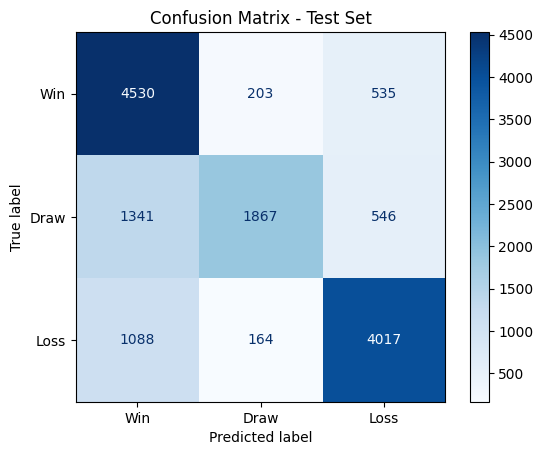

In [ ]:
y_test = test_data["team_result"]
X_test = test_data.drop(columns=["team_result"])

# التنبؤ
y_pred = predictor.predict(X_test)

# رسم الكونفيوجن ماتريكس
cm = confusion_matrix(y_test, y_pred, labels=["Win", "Draw", "Loss"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Win", "Draw", "Loss"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Test Set")
plt.show()

In [ ]:
predictor.feature_importance(test_data)

Computing feature importance via permutation shuffling for 46 features using 5000 rows with 5 shuffle sets...
	160.7s	= Expected runtime (32.14s per shuffle set)
/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/utils.py:955: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['2023-09-30T13:00:00.000000000' '2024-03-03T15:15:00.000000000'
 '2024-10-19T13:30:00.000000000' ... '2024-04-28T16:00:00.000000000'
 '2024-11-30T20:00:00.000000000' '2023-12-15T19:45:00.000000000']' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  X_raw.loc[row_index : row_index_end - 1, feature] = X_shuffled[feature].values
/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/utils.py:955: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['2023-10-29T11:15:00.000000000' '2023-10-22T10

,importance,stddev,p_value,n,p99_high,p99_low
points_diff,0.13520,0.002249,9.192110e-09,5,0.139832,0.130568
is_home,0.11736,0.002539,2.628330e-08,5,0.122588,0.112132
team_points,0.09252,0.001792,1.688778e-08,5,0.096210,0.088830
opponent_points,0.07024,0.001802,5.196299e-08,5,0.073951,0.066529
opponent_name,0.01412,0.005674,2.553766e-03,5,0.025802,0.002438
team_name,0.00932,0.003366,1.730316e-03,5,0.016251,0.002389
opponent_recent_win_rate,0.00296,0.002151,1.852585e-02,5,0.007390,-0.001470
recent_win_rate,0.00188,0.002096,5.766785e-02,5,0.006195,-0.002435
rank_diff,0.00176,0.001846,5.000224e-02,5,0.005561,-0.002041
opponent_fouls_avg,0.00164,0.001830,5.778207e-02,5,0.005407,-0.002127
